In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("google_trends_macron.csv", sep=",")
df.tail()

,Week,macron
256,2016-08-21,9
257,2016-08-28,98
258,2016-09-04,34
259,2016-09-11,17
260,2016-09-18,13


<AxesSubplot:xlabel='Week'>

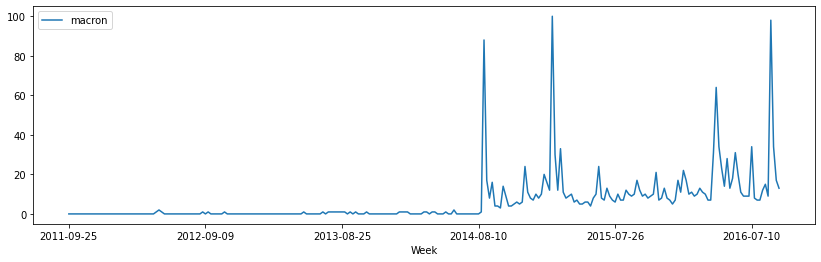

In [6]:
df.plot(x="Week", y="macron", figsize=(14,4))

<AxesSubplot:xlabel='Week'>

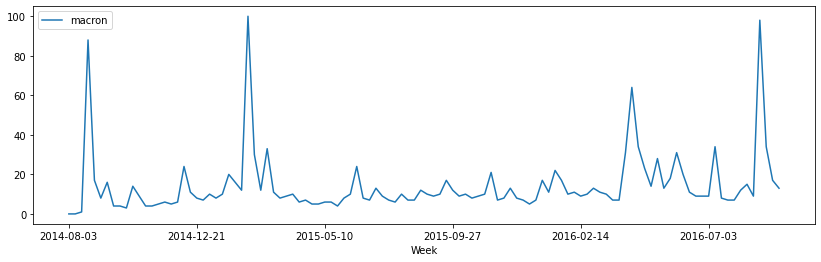

In [7]:
df[df.Week >= "2014-08"].plot(x="Week", y="macron", figsize=(14,4))

In [8]:
data = df[df.Week >= "2014-08"].copy()

<AxesSubplot:xlabel='Week'>

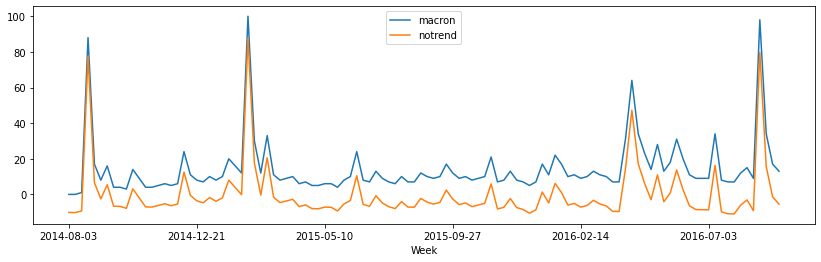

In [9]:
from statsmodels.tsa.tsatools import detrend
notrend = detrend(data.macron)
data["notrend"] = notrend
data.plot(x="Week", y=["macron", "notrend"], figsize=(14,4))

In [10]:
from statsmodels.tsa.stattools import acf
cor = acf(data.notrend)
cor

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.00000000e+00,  1.81478584e-01,  7.71694317e-03,  6.10314527e-02,
       -3.12083821e-02, -5.82876827e-02, -3.76040376e-02,  7.26138869e-02,
       -4.37474938e-02, -8.95598327e-02, -6.59322125e-02, -7.63327292e-02,
       -3.54159381e-02,  3.38419910e-02, -2.35595163e-02, -4.74118451e-02,
       -3.53898523e-02, -1.37790825e-02, -1.21436276e-02,  9.54084115e-03,
        1.10601624e-01,  4.84432935e-02,  8.45674666e-03, -5.47832160e-02,
       -1.72073748e-02,  2.16452288e-01,  1.08989553e-03, -3.85780099e-02,
        2.84947228e-04, -1.77271624e-02, -2.46716340e-02,  1.34294810e-02,
        2.34894397e-02, -2.82512712e-02, -1.76425935e-02, -3.77660611e-02,
       -6.79376963e-02, -5.36774061e-02, -2.86750133e-02, -4.95528192e-02,
       -4.18258630e-02])

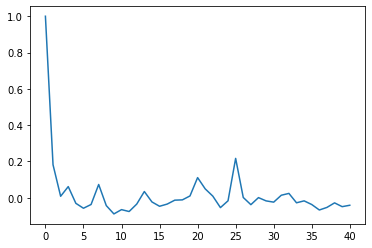

In [11]:
plt.plot(cor)

<AxesSubplot:xlabel='Week'>

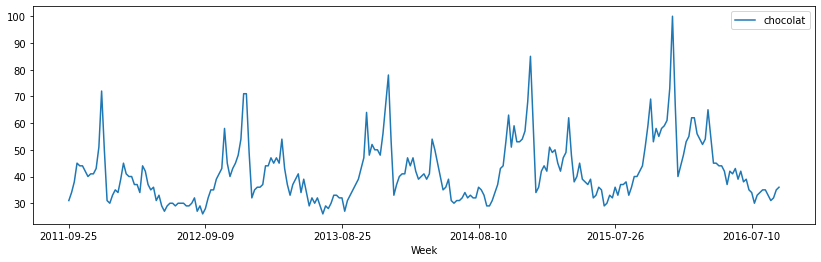

In [13]:
choco = pd.read_csv("google_trends_chocolat.csv", sep=",")
choco.plot(x="Week", y="chocolat", figsize=(14,4))

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


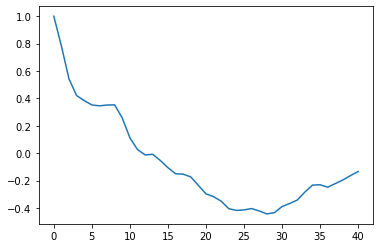

In [14]:
choco["notrend"] = detrend(choco.chocolat)
cor = acf(choco.notrend)
plt.plot(cor)

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


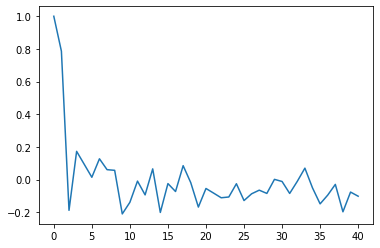

In [15]:
from statsmodels.tsa.stattools import pacf
pcor = pacf(choco.notrend)
plt.plot(pcor)

# Tendance

In [16]:
from statsmodels.api import OLS
import numpy
y = data.macron
X = numpy.ones((len(y), 2))
X[:,1] = numpy.arange(0,len(y))
reg = OLS(y,X)
results = reg.fit()
results.params

const    10.137010
x1        0.075234
dtype: float64

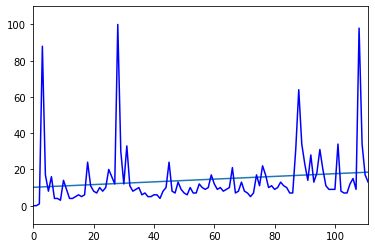

In [17]:
from statsmodels.graphics.regressionplots import abline_plot
fig = abline_plot(model_results=results)
ax = fig.axes[0]
ax.plot(X[:,1], y, 'b')
ax.margins(.1)

# Prédictions 

<AxesSubplot:xlabel='Week'>

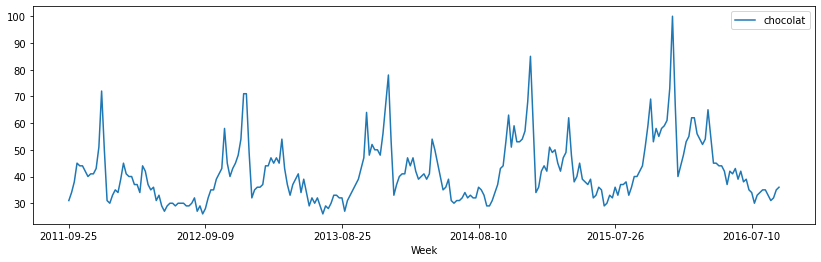

In [18]:
df = pd.read_csv("google_trends_chocolat.csv", sep=",")
df.plot(x="Week", y="chocolat", figsize=(14,4))

In [20]:
df["diff"] = numpy.nan
df.loc[1:, "diff"] = (df.iloc[1:, 1].values - df.iloc[:len(df)-1, 1].values)
pd.concat([df.head(n=3), df.tail(n=3)])

,Week,chocolat,diff
0,2011-09-25,31,NaN
1,2011-10-02,34,3.0
2,2011-10-09,38,4.0
258,2016-09-04,32,1.0
259,2016-09-11,35,3.0
260,2016-09-18,36,1.0


<AxesSubplot:xlabel='Week'>

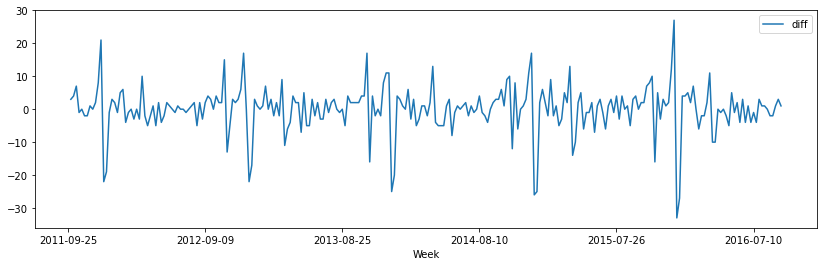

In [21]:
df.plot(x="Week", y="diff", figsize=(14,4))

In [22]:
(df["diff"].apply(lambda x:x**2).sum()/len(df))**0.5

7.168203524067387

In [23]:
from statsmodels.tsa.arima_model import ARMA
arma_mod = ARMA(df["diff"].dropna().values, order=(8, 1))
res = arma_mod.fit()
res.params

/home/amaurylc/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28832D+00    |proj g|=  2.66871D-03

At iterate    5    f=  3.28825D+00    |proj g|=  3.73124D-04

At iterate   10    f=  3.28825D+00    |proj g|=  7.94476D-05

At iterate   15    f=  3.28825D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     17     25      1     0     0   8.882D-08   3.288D+00
  F =   3.2882472729936247     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


array([-0.00318787,  0.23324379, -0.32390615, -0.13429148, -0.05203164,
       -0.13237594,  0.00292415, -0.06093013,  0.18300791, -0.25978752])